In [15]:
from flask import Flask, render_template, url_for
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [16]:
# Load Data
data = pd.read_csv(r'data_train.csv')

In [17]:
print(data)

      id_mentah          username  \
0          1152       iwit.akbar_   
1          2485          yaayaoke   
2            97    adellyaputriii   
3           252      annissaptri_   
4          2032    rosiyaninandam   
...         ...               ...   
2296       1639          nicaayis   
2297       1096         indahsvr_   
2298       1131         itaalutfi   
2299       1295        lalaa_zraa   
2300        861  firmanadikrniawn   

                                            comment    Label  
0                            aku anak indomie hadir   netral  
1                              Galau ? Jogjain ajaa  negatif  
2                              Rumah pocong jogja 👻  negatif  
3     Ini tempat yg pernah didatengin DMS itu, kan?  positif  
4                                       Mirip kak😭😍  positif  
...                                             ...      ...  
2296                          ❤️❤️❤️ cocok bngttttt  positif  
2297                               Kangen ke jogja😭

In [18]:
#data = data.fillna(' ')
data = data.dropna()

In [19]:
data.dropna()

,id_mentah,username,comment,Label
0,1152,iwit.akbar_,aku anak indomie hadir,netral
1,2485,yaayaoke,Galau ? Jogjain ajaa,negatif
2,97,adellyaputriii,Rumah pocong jogja 👻,negatif
3,252,annissaptri_,"Ini tempat yg pernah didatengin DMS itu, kan?",positif
4,2032,rosiyaninandam,Mirip kak😭😍,positif
...,...,...,...,...
2296,1639,nicaayis,❤️❤️❤️ cocok bngttttt,positif
2297,1096,indahsvr_,Kangen ke jogja😭,positif
2298,1131,itaalutfi,Luv❤️❤️❤️❤️,positif
2299,1295,lalaa_zraa,Ncesss @yurikeputri.ad,positif


In [20]:
data.isna().any()

id_mentah    False
username     False
comment      False
Label        False
dtype: bool

In [21]:
# Split into train and test data
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(data['comment'], data['Label'], test_size = 0.1, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

In [22]:
df_train90 = pd.DataFrame()
#df_train90['username'] = train_X
df_train90['comment'] = train_X
df_train90['Label'] = train_Y

df_test10 = pd.DataFrame()
#df_test10['username'] = test_X
df_test10['comment'] = test_X
df_test10['Label'] = test_Y

In [23]:
df_train90

,comment,Label
1501,Pusing liatnya,negatif
478,@astrit_rabeca nanti kasi tau aku di skul,netral
452,Awas jatoh mba,negatif
1907,Mas abi gantenggg🥺😍,positif
2213,Caption : Awkarin bobo di awan,netral
...,...,...
1033,😱😱😱,netral
1731,Abis ngeliat bawaanya mual yak,negatif
763,"Awas ka ketiban genteng,@awkarin",negatif
835,Bagus banget body nya..😍😍,positif


In [24]:
df_test10

,comment,Label
1349,Penah nnton di @diarymisterisara,positif
333,Keanu mau jadi ular ya :( @keanuagl,negatif
2129,mas abi mbak karin 😭,netral
286,❤️,positif
57,pgn lg ih😭,positif
...,...,...
1151,Gimana2 @abonxx 🙈,positif
1374,yang terakhir aamiin!,positif
48,Langsung enek 😥,negatif
384,❤️😭,netral


In [25]:
df_train90.to_csv(r'data_train90new1.csv')
df_test10.to_csv(r'data_test10new1.csv')

In [26]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_9010 = TfidfVectorizer(max_features = 5000)
tfidf_vect_9010.fit(data['comment'])
train_X_tfidf_9010 = tfidf_vect_9010.transform(df_train90['comment'])
test_X_tfidf_9010 = tfidf_vect_9010.transform(df_test10['comment'])

In [27]:
tfidf_vect_9010

TfidfVectorizer(max_features=5000)

In [28]:
print(train_X_tfidf_9010)

  (0, 1995)	0.671169148462092
  (0, 1445)	0.7413042385907896
  (1, 2353)	0.34234942719732636
  (1, 2251)	0.45667822377480877
  (1, 1707)	0.394341218177956
  (1, 1235)	0.43367148975756087
  (1, 586)	0.24068215002086865
  (1, 197)	0.45667822377480877
  (1, 101)	0.25334366942189346
  (2, 1564)	0.4753792117502504
  (2, 1118)	0.6658837256287867
  (2, 214)	0.5749899729373001
  (3, 1549)	0.45185955109919757
  (3, 837)	0.7498876843582815
  (3, 42)	0.48320948555280463
  (4, 586)	0.282291883386006
  (4, 451)	0.48950011225286844
  (4, 398)	0.5356298997644354
  (4, 216)	0.3269589479361169
  (4, 213)	0.5356298997644354
  (5, 1564)	0.3652093715467457
  (5, 1496)	0.39767800294805966
  (5, 1468)	0.40926655909842313
  (5, 1434)	0.5115641806563848
  (5, 1217)	0.32441244149066994
  :	:
  (2059, 1377)	0.4956627040992275
  (2059, 1087)	0.43375924343414146
  (2059, 569)	0.4900588816852323
  (2060, 2611)	0.5814714569093415
  (2060, 1217)	0.38830698775008726
  (2060, 267)	0.7149186163922306
  (2062, 2219)	0.4

In [29]:
print(test_X_tfidf_9010)

  (0, 1909)	0.5998892952873259
  (0, 1797)	0.5998892952873259
  (0, 595)	0.424628718279337
  (0, 586)	0.3161583755205579
  (1, 2581)	0.32207800058566455
  (1, 2465)	0.49051776640798744
  (1, 1560)	0.36830369036315724
  (1, 1259)	0.42305453315339575
  (1, 1258)	0.45319722824062086
  (1, 1098)	0.36830369036315724
  (2, 1567)	0.6398881738868639
  (2, 1549)	0.4351139303748082
  (2, 1226)	0.4297824898369861
  (2, 42)	0.46530205667183766
  (4, 1935)	0.5941771486890893
  (4, 1437)	0.5825017957464198
  (4, 1026)	0.5546577087969662
  (5, 2607)	0.2716684888520146
  (5, 2445)	0.3740902696280518
  (5, 1683)	0.46006737093461386
  (5, 1059)	0.23587684750954113
  (5, 846)	0.4368898969889183
  (5, 545)	0.46006737093461386
  (5, 418)	0.34120091068910147
  (6, 1217)	0.4995245577988616
  :	:
  (222, 943)	0.44560646457109293
  (222, 793)	0.34760085372089344
  (222, 586)	0.265018822636723
  (223, 2565)	0.5262375122945027
  (223, 1818)	0.49972649021163706
  (223, 1109)	0.42789457653284463
  (223, 1059)	0.26

In [30]:
print(train_X_tfidf_9010.shape)
print(test_X_tfidf_9010.shape)

(2070, 2646)
(231, 2646)


In [31]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_9010.vocabulary_)

{'aku': 101, 'anak': 133, 'indomie': 1050, 'hadir': 935, 'galau': 822, 'jogjain': 1156, 'ajaa': 88, 'rumah': 2068, 'pocong': 1962, 'jogja': 1151, 'ini': 1059, 'tempat': 2368, 'yg': 2607, 'pernah': 1926, 'didatengin': 602, 'dms': 660, 'itu': 1087, 'kan': 1215, 'mirip': 1631, 'kak': 1189, 'adem': 58, 'banget': 267, 'muka': 1665, 'cwonya': 531, 'kyk': 1392, 'ubin': 2453, 'mesjid': 1620, 'pengenn': 1918, 'woi': 2568, 'pgn': 1935, 'angel': 136, 'agathatian_': 74, 'melpusa': 1590, 'jovitaagusti': 1160, 'yang': 2598, 'dipake': 635, 'ga': 805, 'si': 2219, 'hampir': 951, 'sm': 2256, 'rumahku': 2071, 'jeremy': 1139, 'roberts': 2061, '549436': 21, 'my': 1685, 'fav': 774, 'one': 1854, 'haga': 942, 'perorang': 1928, 'atau': 200, 'permobil': 1925, 'kaget': 1186, 'harganya': 957, 'semurah': 2169, 'kesini': 1306, 'apa': 159, 'estilarasati': 749, 'mah': 1492, 'lana': 1412, 'del': 570, 'rey': 2031, 'veliaandrestia_': 2498, 'gas': 844, 'rono': 2063, 'ver_gud': 2499, 'wani': 2532, 'tak': 2330, 'jak': 1105

In [32]:
# Proses Pelatihan
''' awalnya begini ya

from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_a_tfidf,train_b)

trus diganti jadi begini'''

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_tfidf_9010,train_Y)

SVC(kernel='linear')

In [33]:
# Proses Pengujian

from sklearn.metrics import accuracy_score

predictions_SVM_9010 = model.predict(test_X_tfidf_9010)
test_prediction_9010 = pd.DataFrame()
test_prediction_9010['Sentiment'] = test_X
test_prediction_9010['Label'] = predictions_SVM_9010
SVM_accuracy_9010 = accuracy_score(predictions_SVM_9010, test_Y)*100
SVM_accuracy_9010 = round(SVM_accuracy_9010,1)

In [34]:
test_prediction_9010

,Sentiment,Label
1349,Penah nnton di @diarymisterisara,positif
333,Keanu mau jadi ular ya :( @keanuagl,negatif
2129,mas abi mbak karin 😭,positif
286,❤️,positif
57,pgn lg ih😭,positif
...,...,...
1151,Gimana2 @abonxx 🙈,positif
1374,yang terakhir aamiin!,positif
48,Langsung enek 😥,positif
384,❤️😭,positif


In [35]:
test_prediction_9010.to_csv(r'test_prediction_9010newbanget.csv')

In [36]:
SVM_accuracy_9010

74.9

In [37]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_SVM_9010))


Here is the classification report:
              precision    recall  f1-score   support

     negatif       0.80      0.61      0.69        33
      netral       0.57      0.09      0.15        47
     positif       0.75      0.99      0.85       151

    accuracy                           0.75       231
   macro avg       0.71      0.56      0.56       231
weighted avg       0.72      0.75      0.69       231



### Bar and Pie Plot

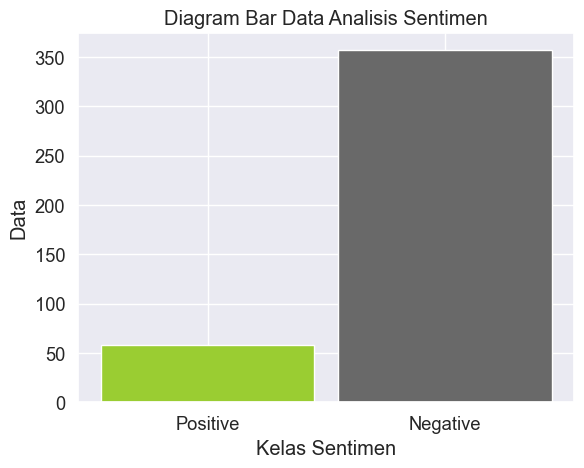

In [38]:
#Bar plot for comment reviews

labels = ['Positive','Negative']
Category1 = [58, 357]
plt.bar(labels, Category1, tick_label=labels, width=0.9, color=['yellowgreen', 'dimgray'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen')
#plt.savefig(r"bar_data.png")
plt.show()

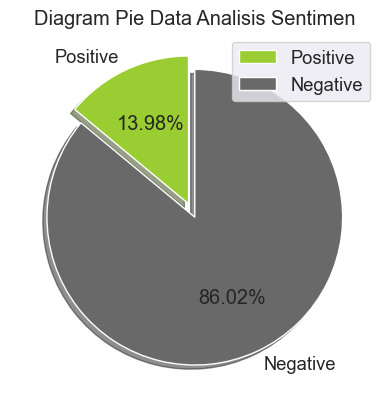

In [39]:
#pie chart for comment reviews

color = ['yellowgreen', 'dimgray']
plt.pie(Category1, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie Data Analisis Sentimen')
plt.legend()
#plt.savefig(r'pie_dataneww.png')
plt.show()

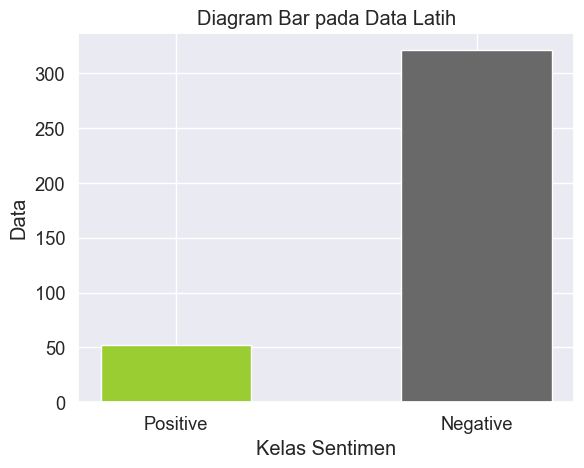

In [40]:
#Bar plot for Train Set

labels = ['Positive','Negative']
Category2 = [52, 321]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['yellowgreen', 'dimgray'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Data Latih')
#plt.savefig(r'bar_datalatihnew.png')
plt.show()

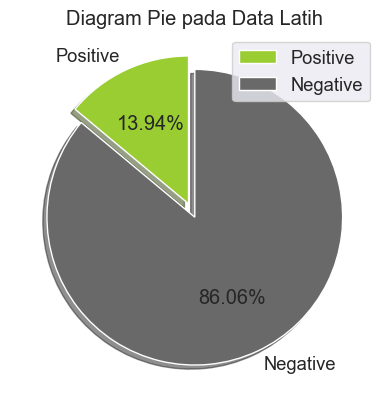

In [41]:
#pie chart for Train Set

color = ['yellowgreen', 'dimgray']
plt.pie(Category2, labels=labels, colors=color, startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie pada Data Latih')
plt.legend()
#plt.savefig(r'pie_datalatihnew.png')
plt.show()

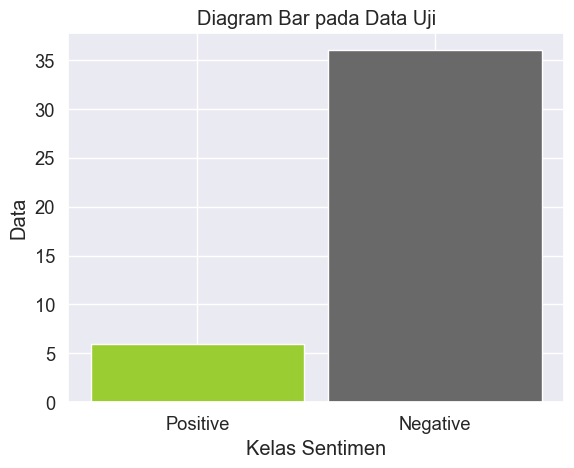

In [42]:
#Bar plot for Test Set

labels = ['Positive','Negative']
Category3 = [6, 36]
plt.bar(labels, Category3, tick_label=labels, width=0.9, color=['yellowgreen', 'dimgray'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Data Uji')
plt.savefig(r'bar_dataujinew.png')
plt.show()

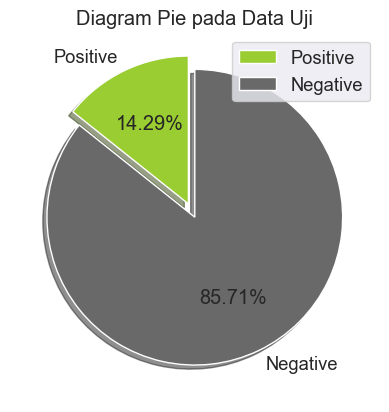

In [43]:
#pie chart for Test Set

color = ['yellowgreen', 'dimgray']
plt.pie(Category3, labels=labels, colors=color, startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie pada Data Uji')
plt.legend()
plt.savefig(r'pie_dataujinew.png')
plt.show()

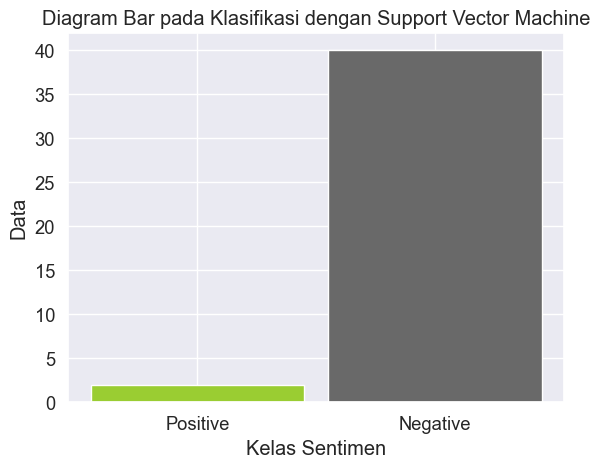

In [44]:
#Bar plot for Klasifikasi dengan SVM

labels = ['Positive','Negative']
Category4 = [2, 40]
plt.bar(labels, Category4, tick_label=labels, width=0.9, color=['yellowgreen', 'dimgray'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan Support Vector Machine')
#plt.savefig(r'bar_svmnew.png')
plt.show()

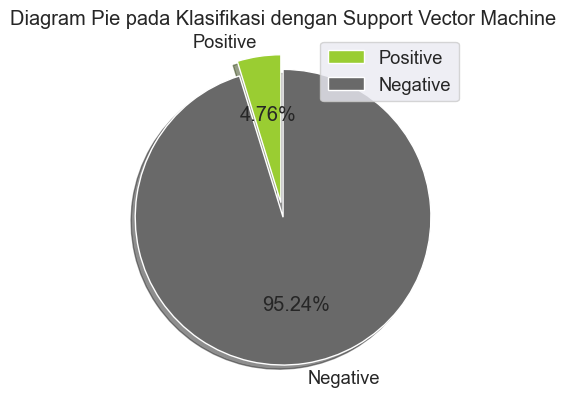

In [45]:
#pie chart for Klasifikasi dengan SVM

color = ['yellowgreen', 'dimgray']
plt.pie(Category4, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie pada Klasifikasi dengan Support Vector Machine')
plt.legend()
#plt.savefig(r"pie_svm.png")
plt.show()